<a href="https://colab.research.google.com/github/KingBeeM/Daily_Coding/blob/main/Python/20230414_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- url link csv 파일

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# GROUP BY

In [ ]:
grouped = titanic.groupby("Sex")["Age"].agg("mean")
grouped

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [ ]:
agg_dict = {"Age" : "mean",
            "Fare": "median"}

grouped = titanic.groupby("Sex").agg(agg_dict)
grouped

,Age,Fare
Sex,,
female,27.915709,23.0
male,30.726645,10.5


In [ ]:
agg_dict = {"Age" : "mean",
            "Fare": ["median", "sum"]}

grouped = titanic.groupby("Sex").agg(agg_dict)
grouped

Age   Fare            
             mean median         sum
Sex                                 
female  27.915709   23.0  13966.6628
male    30.726645   10.5  14727.2865

### Multiindex

In [ ]:
agg_dict = {"Age" : "mean",
            "Fare": "median"}

grouped = titanic.groupby("Sex").agg(agg_dict)
grouped = grouped.reset_index()
grouped

,Sex,Age,Fare
0,female,27.915709,23.0
1,male,30.726645,10.5


In [ ]:
agg_dict = {"Age" : "mean",
            "Fare": ["median", "sum"]}

grouped = titanic.groupby("Sex").agg(agg_dict)
grouped = grouped.reset_index()
grouped

Sex        Age   Fare            
                mean median         sum
0  female  27.915709   23.0  13966.6628
1    male  30.726645   10.5  14727.2865

In [ ]:
from tables.table import Column
agg_dict = {"Age" : "mean",
            "Fare": ["median", "sum"]}

grouped = titanic.groupby("Sex").agg(agg_dict)
print(grouped.columns)
print(type(grouped))

MultiIndex([( 'Age',   'mean'),
            ('Fare', 'median'),
            ('Fare',    'sum')],
           )
<class 'pandas.core.frame.DataFrame'>


#### 1.

In [ ]:
agg_dict = {"Age" : "mean",
            "Fare": ["median", "sum"]}

grouped = titanic.groupby("Sex").agg(agg_dict)
grouped.columns = ["_".join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)
grouped

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


#### 2.

In [ ]:
agg_dict = {"Age" : "mean",
            "Fare": ["median", "sum"]}

grouped = titanic.groupby("Sex").agg(agg_dict)
new_cols = []

for col in grouped.columns:
  if isinstance(col, tuple):
    new_col = f"{col[0]}_{col[1]}"
  else:
    new_col = col  
  new_cols.append(new_col)

grouped.columns = new_cols
grouped = grouped.reset_index()
grouped

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


In [ ]:
agg_dict = {"Age" : "mean",
            "Fare": ["median", "sum"]}

grouped = titanic.groupby("Sex").agg(agg_dict)
grouped.columns = ["_".join(col).strip() if isinstance(col, tuple) else col for col in grouped.columns.values]
grouped.reset_index(inplace=True)
grouped

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


# 데이터 시각화
- 나이팅게일 : 로즈 다이어그램(Rose Diagram)
- **정확하고 군더더기 없고 예쁜 시각화**

## 시각화
- matplotlib : 정형 데이터, 이미지 데이터 시각화
- seaborn : 정형 데이터 시각화

## 그외
- PowerBI
- Tableau

### matplotlib

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print(mpl.__version__)

3.7.1


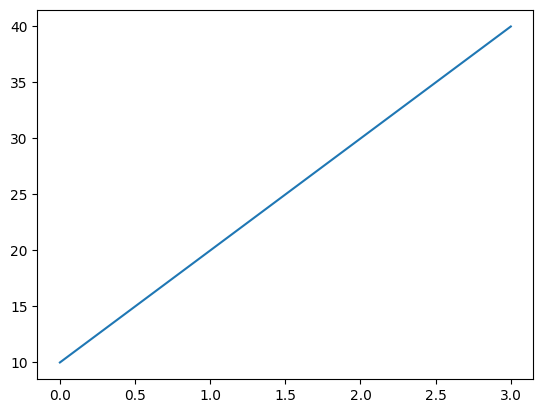

In [6]:
plt.plot([10, 20, 30, 40])
plt.show()

#### 커스텀화
- matplotlib 그릴 때, 객체지향으로 그린다.

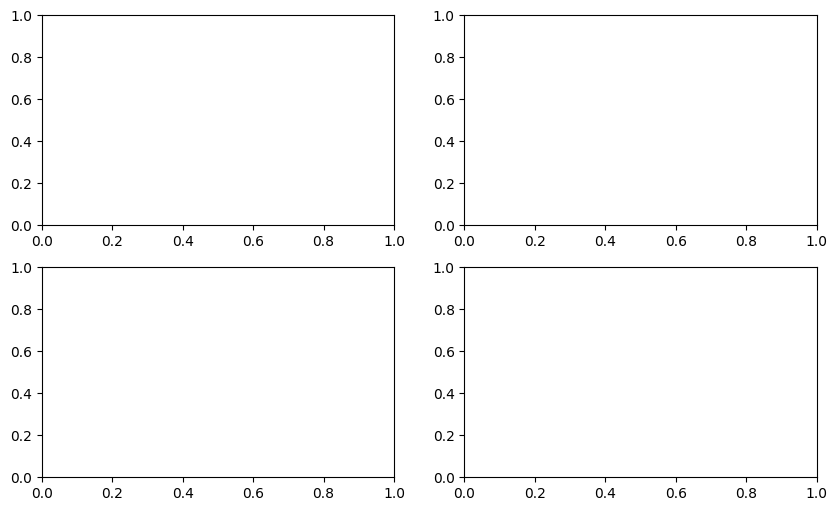

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
plt.show()

In [4]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

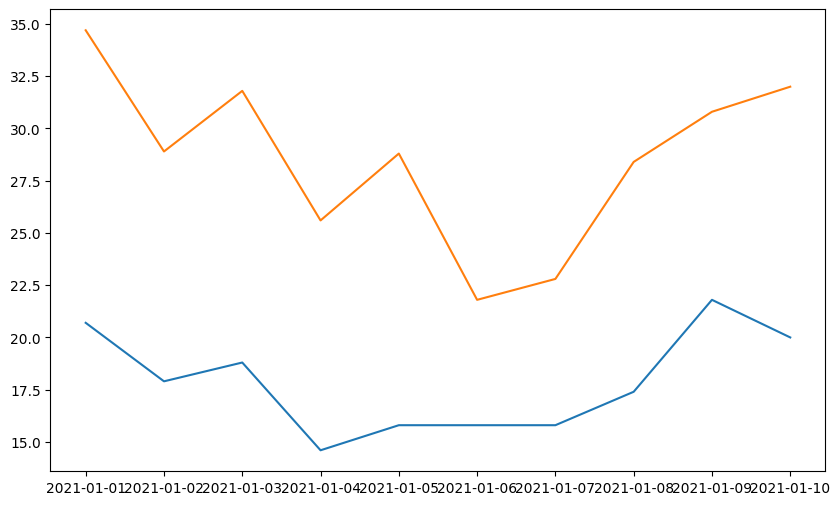

In [13]:
fig, axs = plt.subplots(figsize=(10, 6))
axs.plot(dates, min_temperature, label="Min Temp.")
axs.plot(dates, max_temperature, label="Max Temp.")
plt.show()

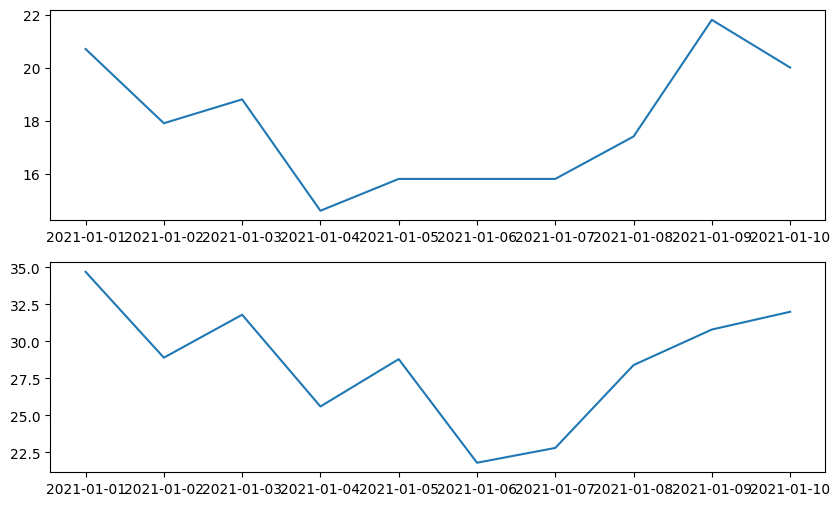

In [14]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 6))
axs[0].plot(dates, min_temperature, label="Min Temp.")
axs[1].plot(dates, max_temperature, label="Max Temp.")
plt.show()

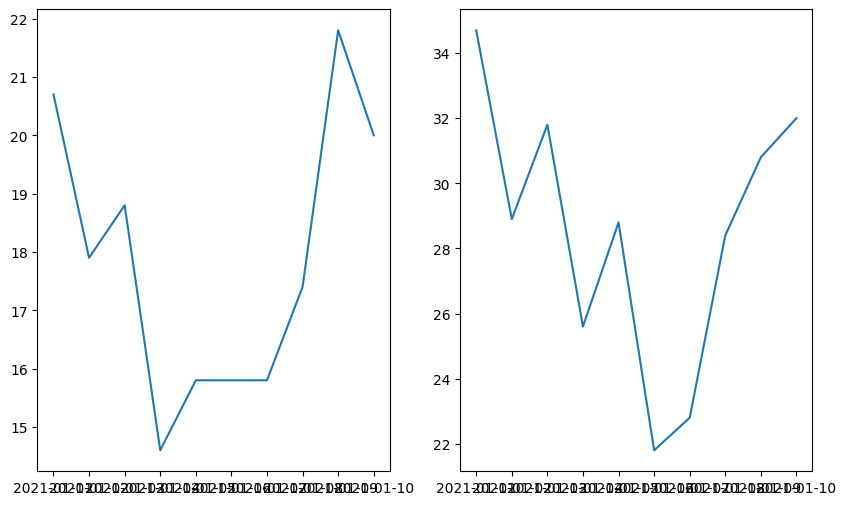

In [15]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
axs[0].plot(dates, min_temperature, label="Min Temp.")
axs[1].plot(dates, max_temperature, label="Max Temp.")
plt.show()

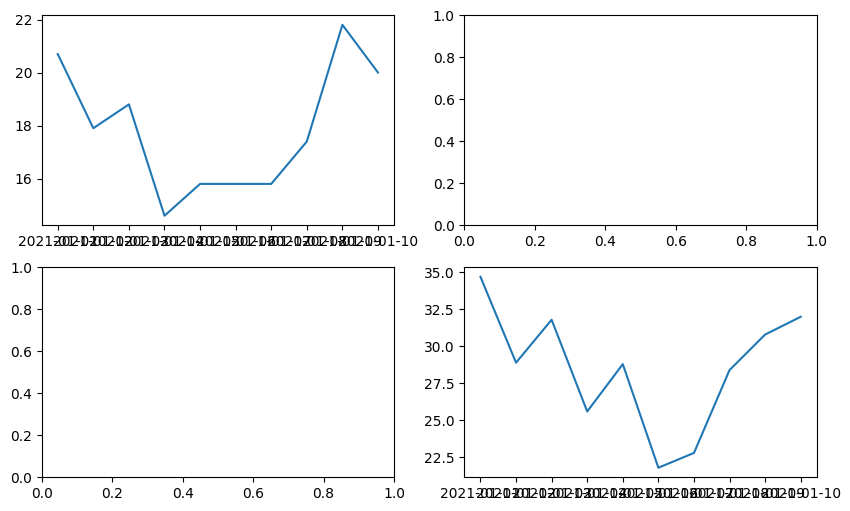

In [16]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 6))
axs[0, 0].plot(dates, min_temperature, label="Min Temp.")
axs[1, 1].plot(dates, max_temperature, label="Max Temp.")
plt.show()

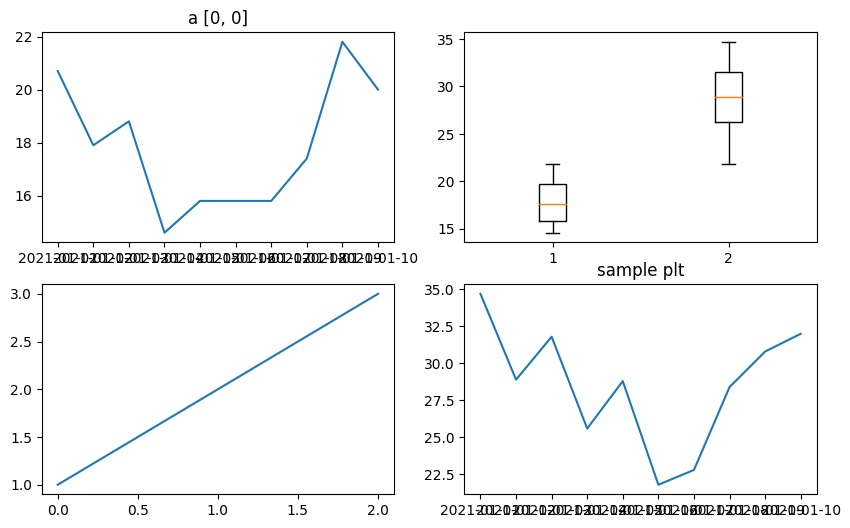

In [23]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 6))
axs[0, 0].plot(dates, min_temperature, label="Min Temp.")
axs[0, 0].set_title("a [0, 0]")
axs[0, 1].boxplot([min_temperature, max_temperature])
axs[1, 0].plot([1, 2, 3])
axs[1, 1].plot(dates, max_temperature, label="Max Temp.")
plt.show()

In [24]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import yfinance as yf

TSLA = yf.download("TSLA", start="2019-08-01", end="2023-04-13")
TSLA["Close"]
AAPL = yf.download("AAPL", start="2019-08-01", end="2023-04-13")
AAPL["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2019-08-01     52.107498
2019-08-02     51.005001
2019-08-05     48.334999
2019-08-06     49.250000
2019-08-07     49.759998
                 ...    
2023-04-05    163.759995
2023-04-06    164.660004
2023-04-10    162.029999
2023-04-11    160.800003
2023-04-12    160.100006
Name: Close, Length: 931, dtype: float64

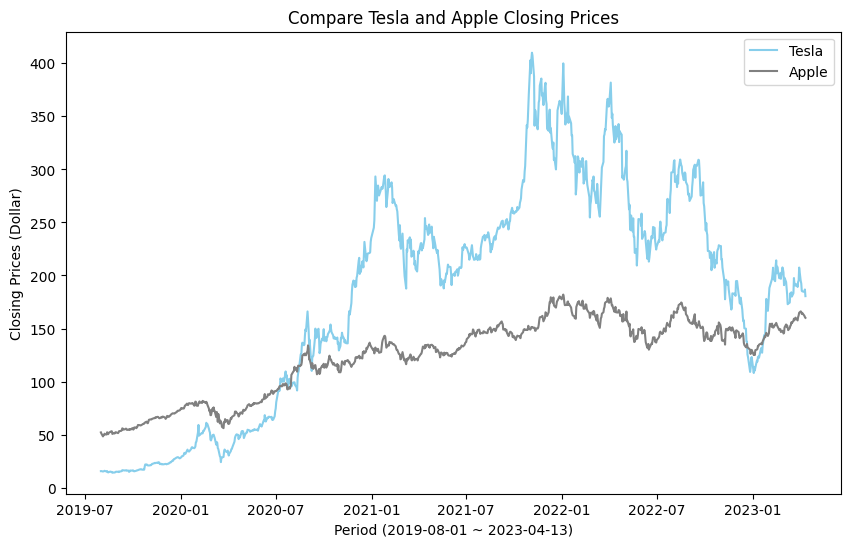

In [65]:
fig, axs = plt.subplots(figsize=(10, 6))
axs.plot(TSLA["Close"], label = "Tesla", color="skyblue")
axs.plot(AAPL["Close"], label = "Apple", color="grey")
axs.set_title("Compare Tesla and Apple Closing Prices")
axs.set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs.set_ylabel("Closing Prices (Dollar)")
axs.legend()
plt.show()

In [66]:
SPX = yf.download("^GSPC", start="2019-08-01", end="2023-04-13")
SPX["Close"]

[*********************100%***********************]  1 of 1 completed


Date
2019-08-01    2953.560059
2019-08-02    2932.050049
2019-08-05    2844.739990
2019-08-06    2881.770020
2019-08-07    2883.979980
                 ...     
2023-04-05    4090.379883
2023-04-06    4105.020020
2023-04-10    4109.109863
2023-04-11    4108.939941
2023-04-12    4091.949951
Name: Close, Length: 931, dtype: float64

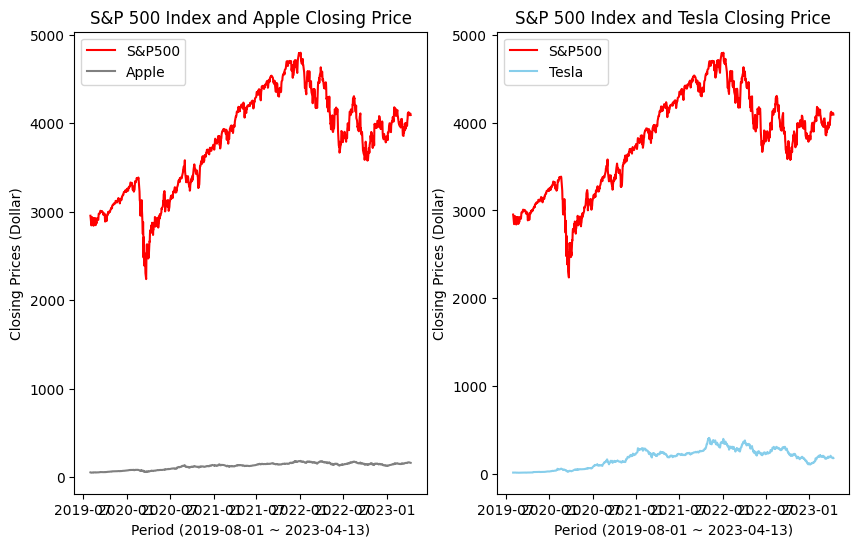

In [67]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axs[0].plot(SPX["Close"], label="S&P500", color="red")
axs[0].plot(AAPL["Close"], label="Apple", color="grey")
axs[0].set_title("S&P 500 Index and Apple Closing Price")
axs[0].set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs[0].set_ylabel("Closing Prices (Dollar)")
axs[0].legend()

axs[1].plot(SPX["Close"], label="S&P500", color="red")
axs[1].plot(TSLA["Close"], label = "Tesla", color="skyblue")
axs[1].set_title("S&P 500 Index and Tesla Closing Price")
axs[1].set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs[1].set_ylabel("Closing Prices (Dollar)")
axs[1].legend()

plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axs[0].plot(SPX["Close"], label="S&P500", color="red")
axs[0].plot(AAPL["Close"], label="Apple", color="grey")
axs[0].set_title("S&P 500 Index and Apple Closing Price")
axs[0].set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs[0].set_ylabel("Closing Prices (Dollar)")
axs[0].legend()

axs[1].plot(SPX["Close"], label="S&P500", color="red")
axs[1].plot(TSLA["Close"], label = "Tesla", color="skyblue")
axs[1].set_title("S&P 500 Index and Tesla Closing Price")
axs[1].set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs[1].set_ylabel("Closing Prices (Dollar)")
axs[1].legend()

plt.show()

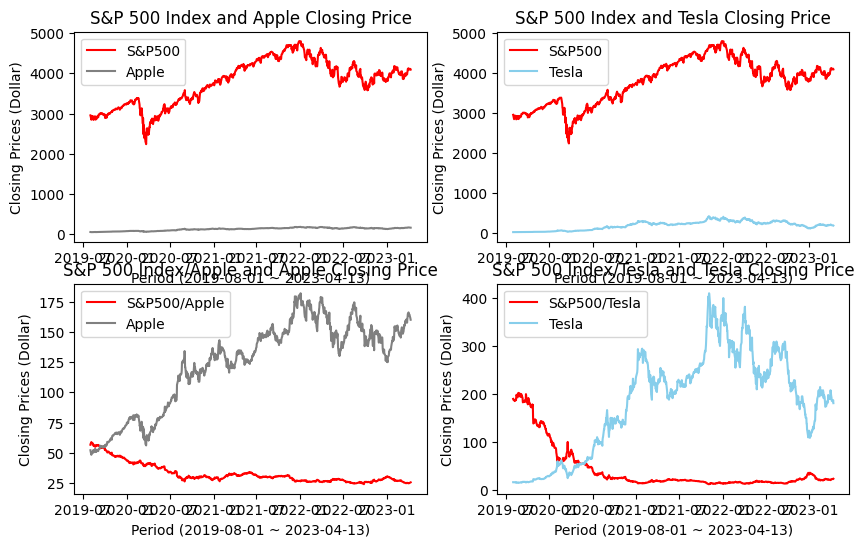

In [117]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axs[0, 0].plot(SPX["Close"], label="S&P500", color="red")
axs[0, 0].plot(AAPL["Close"], label="Apple", color="grey")
axs[0, 0].set_title("S&P 500 Index and Apple Closing Price")
axs[0, 0].set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs[0, 0].set_ylabel("Closing Prices (Dollar)")
axs[0, 0].legend()

axs[0, 1].plot(SPX["Close"], label="S&P500", color="red")
axs[0, 1].plot(TSLA["Close"], label = "Tesla", color="skyblue")
axs[0, 1].set_title("S&P 500 Index and Tesla Closing Price")
axs[0, 1].set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs[0, 1].set_ylabel("Closing Prices (Dollar)")
axs[0, 1].legend()

SPX_A = (SPX["Close"])/AAPL["Close"]
SPX_T = (SPX["Close"])/TSLA["Close"]

axs[1, 0].plot(SPX_A, label="S&P500/Apple", color="red")
axs[1, 0].plot(AAPL["Close"], label="Apple", color="grey")
axs[1, 0].set_title("S&P 500 Index/Apple and Apple Closing Price")
axs[1, 0].set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs[1, 0].set_ylabel("Closing Prices (Dollar)")
axs[1, 0].legend()

axs[1, 1].plot(SPX_T, label="S&P500/Tesla", color="red")
axs[1, 1].plot(TSLA["Close"], label = "Tesla", color="skyblue")
axs[1, 1].set_title("S&P 500 Index/Tesla and Tesla Closing Price")
axs[1, 1].set_xlabel("Period (2019-08-01 ~ 2023-04-13)")
axs[1, 1].set_ylabel("Closing Prices (Dollar)")
axs[1, 1].legend()

plt.show()

### Seaborn

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


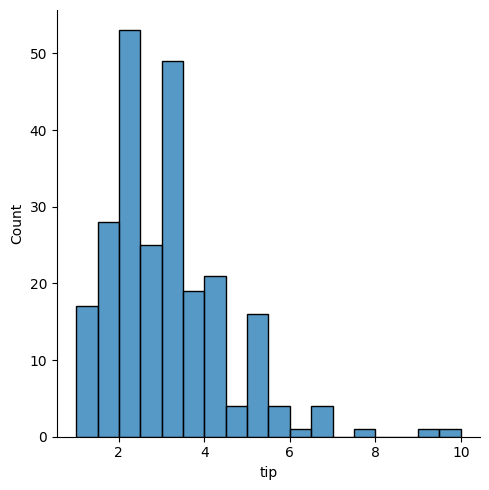

In [70]:
sns.displot(x = "tip", data = tips)

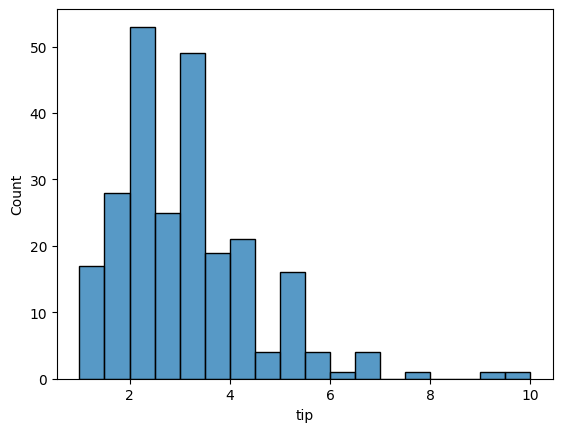

In [74]:
fig, axs = plt.subplots()

# displot 은 지원이 안됨.
# sns.displot(x = "tip", data = tips, ax=axs)

sns.histplot(x = "tip", data = tips, ax=axs)
plt.show()

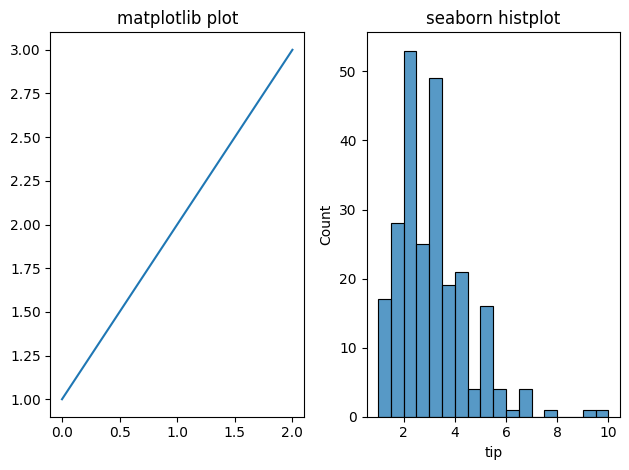

In [85]:
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].plot([1, 2, 3])
axs[0].set_title("matplotlib plot")

sns.histplot(x = "tip", data = tips, ax=axs[1])
axs[1].set_title("seaborn histplot")

plt.tight_layout()
plt.show()

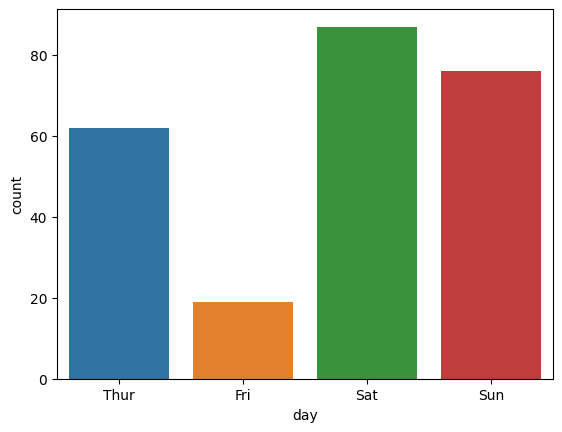

In [87]:
# 막대 그래프
fig, axs = plt.subplots()
sns.countplot(x="day", data=tips)
plt.show()

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


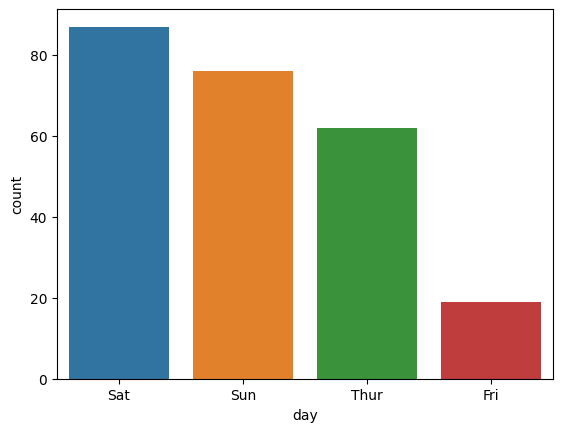

In [95]:
# 그래프 정렬과 텍스트
fig, axs = plt.subplots()
sns.countplot(x="day", 
              data=tips, 
              order=tips["day"].value_counts().index)
print(tips["day"].value_counts().index)
plt.show()

그래프 타입 : <class 'matplotlib.axes._axes.Axes'>
Rectangle(xy=(-0.4, 0), width=0.8, height=87, angle=0) <class 'matplotlib.patches.Rectangle'>
Rectangle(xy=(0.6, 0), width=0.8, height=76, angle=0) <class 'matplotlib.patches.Rectangle'>
Rectangle(xy=(1.6, 0), width=0.8, height=62, angle=0) <class 'matplotlib.patches.Rectangle'>
Rectangle(xy=(2.6, 0), width=0.8, height=19, angle=0) <class 'matplotlib.patches.Rectangle'>


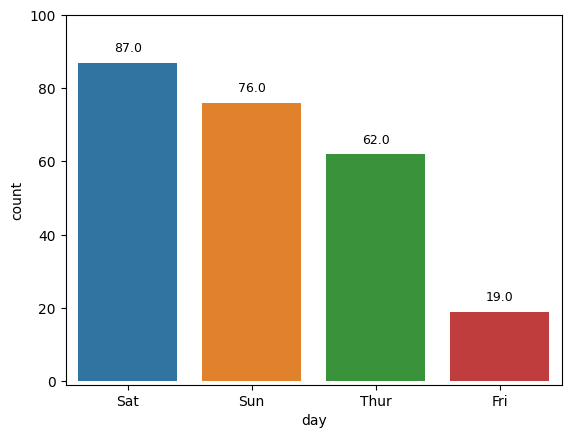

In [102]:
# 그래프 정렬과 텍스트
fig, axs = plt.subplots()
axs = sns.countplot(x="day", data=tips, order=tips["day"].value_counts().index)
print("그래프 타입 :", type(axs))
for p in axs.patches:
  print(p, type(p))
  height = p.get_height()
  axs.text(x = p.get_x() + p.get_width() / 2,
           y = height + 3,
           s = height,
           ha = "center",
           size = 9)
axs.set_ylim(-1, 100)
plt.show()